<a href="https://colab.research.google.com/github/arpitaggarwal0511/Parameter-Optimization-102203872/blob/main/Parameter_Optimization_102203872.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# svm_optimization_assignment.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

In [4]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
dataset = pd.read_csv(url, sep=';')

In [5]:
# Preprocessing
X = dataset.iloc[:, :-1]
y = dataset['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Create 10 Samples
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [7]:
# SVM Kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [8]:
# Result Table Initialization
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [9]:
# Fitness Function
def fitnessFunction(kernel, C, gamma, X_train, y_train, X_test, y_test):
    model = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [10]:
# Optimization
for i in range(len(samples)):
    best_accuracy = 0
    best_C = 0
    best_gamma = 0
    best_kernel = ''
    X_train, X_test, y_train, y_test = samples[i]
    for _ in range(100):
        for kernel in kernels:
            C = np.random.uniform(0.1, 10)
            gamma = np.random.uniform(0.01, 10)
            score = fitnessFunction(kernel, C, gamma, X_train, y_train, X_test, y_test)
            if score > best_accuracy:
                best_accuracy = round(score, 4)
                best_C = round(C, 4)
                best_gamma = round(gamma, 4)
                best_kernel = kernel
    result.loc[i] = [f"S{i+1}", best_accuracy, best_kernel, best_C, best_gamma]

In [11]:
# Save Result Table
result.to_csv("table1_best_accuracies.csv", index=False)

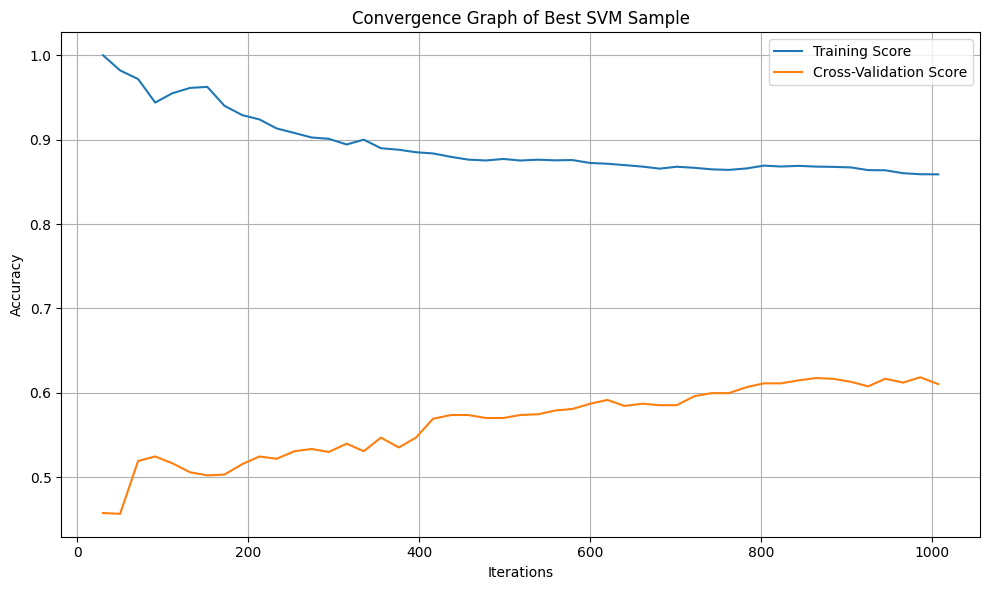

In [12]:
# Convergence Graph for Best Sample
best_sample_idx = result['Best Accuracy'].astype(float).idxmax()
X_train, X_test, y_train, y_test = samples[best_sample_idx]
model = SVC(kernel=result.loc[best_sample_idx, 'Best Kernel'],
            C=result.loc[best_sample_idx, 'Best Nu'],
            gamma=result.loc[best_sample_idx, 'Best Epsilon'],
            max_iter=1000)

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph of Best SVM Sample')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig("figure1_convergence_plot.png")
plt.show()